In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1


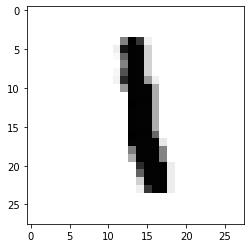

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 # You may select anything up to 60,000
print(y_train[6]) # The label is 8
plt.imshow(x_train[6], cmap='Greys')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=4)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
image_index = 7393
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("The result of is: ",pred.argmax())

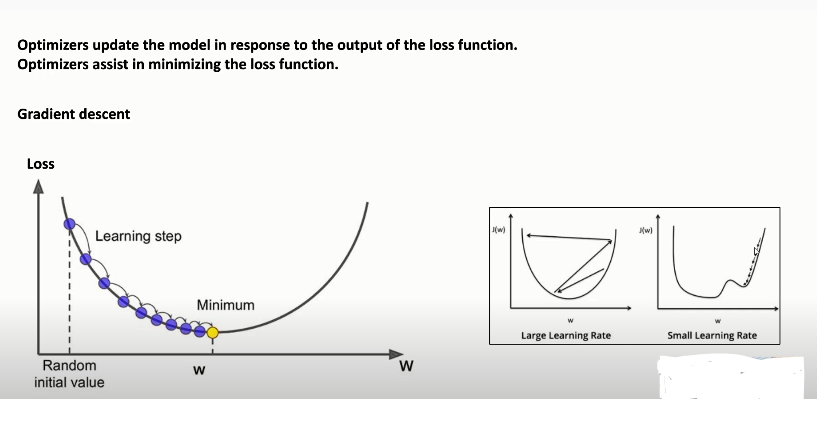

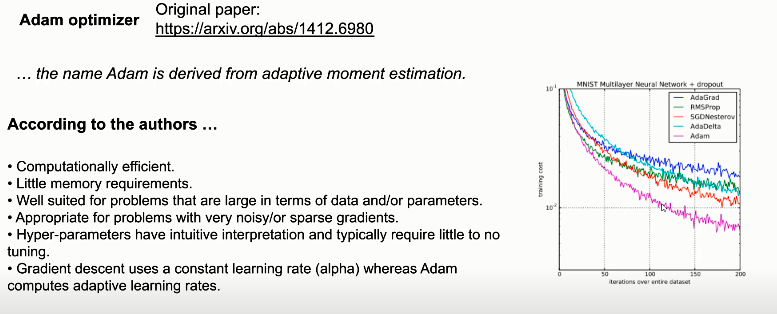

# Data Preparation


In [ ]:
import pandas as pd
import os

In [ ]:
im_name = os.listdir("final_data/Paddy")

FileNotFoundError: ignored

In [ ]:
df1 = pd.DataFrame(im_name,columns=["Images"])

In [ ]:
df1["label"] = "dog"
df1.head()

In [ ]:
im_name2 = os.listdir("final_data/Paddy")
df2 = pd.DataFrame(im_name2,columns=["Images"])

In [ ]:
df2["label"] = "cat"
df2.head()

,Images,label
0,2,cat
1,4,cat
2,6,cat


In [ ]:
data = pd.concat([df1, df2], ignore_index=True, sort=False)

In [ ]:
from sklearn.utils import shuffle
final_data = shuffle(data)

In [ ]:
final_data.to_csv('cat_dog_dataset.csv',index=False) 

# Data Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
train = pd.read_csv('/content/cat_dog_dataset.csv')

In [ ]:
train_image = []
for i in train["Images"]:
  img = image.load_img('/content/allpaddy/'+str(i),target_size=(150,150,3))
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
X1 = np.array(train_image)

In [ ]:
X1.shape

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(train["label"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42, test_size=0.2)

# Binary Classification


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
history = model_.fit(X_train, y_train, epochs = 15,validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 7s 54ms/step - loss: 0.8096 - accuracy: 0.6089 - val_loss: 0.5561 - val_accuracy: 0.6815


In [ ]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/flowerdata/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/flowerdata/valid',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=20,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=20,
    verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 - 6s - loss: 0.6913 - accuracy: 0.4953 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 2/10


UnknownError: ignored

In [ ]:
loss, acc = model.evaluate(test_ds)
print("Accuracy:", acc*100)